In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers

In [10]:
imgs_path = r'C:\Users\admin\Desktop\notebook1\vig projects\15.TRAFFIC SIGNALS\Train'
data_list = []
labels_list = []
classes_list = 43
for i in range(classes_list):
    i_path = os.path.join(imgs_path, str(i))
    for img in os.listdir(i_path):
        im = Image.open(i_path +'/'+ img)
        im = im.resize((32,32))
        im = np.array(im)
        data_list.append(im)
        labels_list.append(i)
data = np.array(data_list)
labels = np.array(labels_list)

In [12]:
data


array([[[[ 75,  78,  80],
         [ 73,  76,  78],
         [ 82,  84,  83],
         ...,
         [ 67,  74,  73],
         [ 65,  68,  67],
         [ 66,  67,  66]],

        [[ 83,  84,  86],
         [ 79,  80,  82],
         [ 85,  86,  83],
         ...,
         [ 73,  77,  77],
         [ 76,  78,  75],
         [ 79,  79,  77]],

        [[ 79,  79,  81],
         [ 84,  84,  85],
         [ 86,  87,  87],
         ...,
         [ 71,  74,  72],
         [ 75,  74,  70],
         [ 79,  78,  75]],

        ...,

        [[128, 130, 136],
         [120, 125, 131],
         [109, 119, 124],
         ...,
         [ 97,  97,  92],
         [ 99, 102,  94],
         [ 99, 104, 100]],

        [[ 89,  93,  97],
         [ 91,  97, 102],
         [ 76,  86,  91],
         ...,
         [105, 104,  97],
         [109, 113, 104],
         [ 96, 104,  97]],

        [[ 85,  84,  87],
         [ 96, 101, 106],
         [ 67,  80,  85],
         ...,
         [103, 104,  95],
        

In [14]:
print(data.shape,labels.shape)

(39209, 32, 32, 3) (39209,)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [16]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 32, 32, 3) (7842, 32, 32, 3) (31367,) (7842,)


In [17]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [18]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))


<!-- # Maxpooling is typically applied after a set of convolutional layers to downsample the feature maps and reduce the spatial dimensionality of the output. The purpose of downsampling is to reduce the number of parameters in the model, speed up the training process, and prevent overfitting.

# In the given code, maxpooling is applied after every two convolutional layers. This is a common practice in CNN architectures, as it allows the model to learn both low-level and high-level features at different spatial scales. The first set of convolutional layers with maxpooling captures local patterns in the image, while the subsequent set captures more complex patterns at a higher level of abstraction. -->

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          36928     
                                                        

In [20]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
history = model.fit(X_train, y_train, batch_size=32, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
981/981 [==============================] - 149s 148ms/step - loss: 1.5928 - accuracy: 0.5994 - val_loss: 0.3163 - val_accuracy: 0.9174
Epoch 2/15
981/981 [==============================] - 140s 143ms/step - loss: 0.4633 - accuracy: 0.8665 - val_loss: 0.1178 - val_accuracy: 0.9702
Epoch 3/15
981/981 [==============================] - 144s 147ms/step - loss: 0.3149 - accuracy: 0.9111 - val_loss: 0.1870 - val_accuracy: 0.9583
Epoch 4/15
981/981 [==============================] - 144s 146ms/step - loss: 0.2467 - accuracy: 0.9309 - val_loss: 0.0809 - val_accuracy: 0.9763
Epoch 5/15
981/981 [==============================] - 143s 146ms/step - loss: 0.2247 - accuracy: 0.9375 - val_loss: 0.0609 - val_accuracy: 0.9827
Epoch 6/15
981/981 [==============================] - 141s 144ms/step - loss: 0.2064 - accuracy: 0.9430 - val_loss: 0.0670 - val_accuracy: 0.9820
Epoch 7/15
981/981 [==============================] - 146s 149ms/step - loss: 0.1899 - accuracy: 0.9497 - val_loss: 0.0620 -

In [22]:
model.save("my_model.h5")

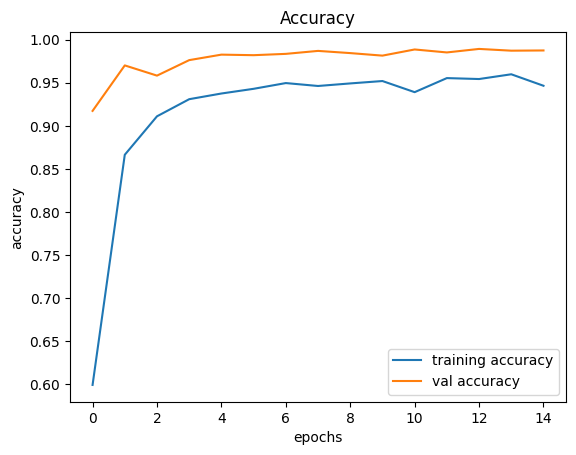

In [23]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

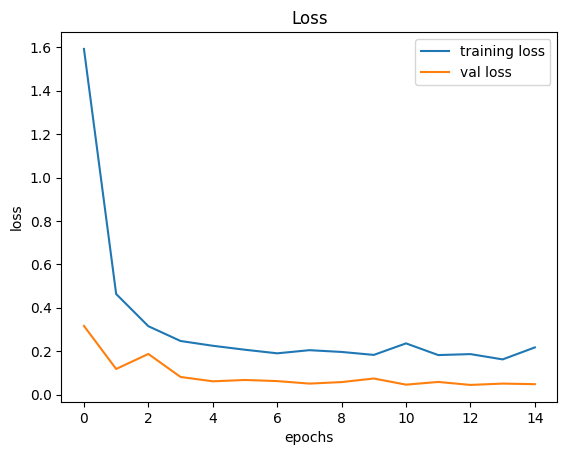

In [24]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [25]:
dic={0:'Speed Limit-20',1:'Speed Limit-30',2:'Speed Limit-50',3:'Speed Limit-60',4:'Speed Limit-70',5:'Speed Limit-80',6:'End of Maximum speed-80',
     7:'Speed Limit-100',8:'Speed Limit-120',9:'No Passing (overtaking) for any vehicle type except one line (track) transport (like motorcycles and mopeds)',10:'No passing for vehicles with a total weight of over 3.5 t',
     11:'Indicates priority only at the upcoming intersection or crossing',12:'Priority Road starts',13:'Yield right-of-way',
     14:'STOP',15:'No entry for any type of Vehicle',16:'No entry for motor vehicles with a maximum authorized mass of more than 3.5 t',
     17:'Do not enter',18:'This is a general danger or warning sign.',19:'A single curve is approaching in the left direction',
     20:'A single curve is approaching in the right direction',
     21:'Indicates an approaching double curve - first to the left',22:'Warning of a rough road ahead.',23:'The danger of skidding or slipping.',
     24:'he road narrows from the right side',25:'Work in process',26:'Indicates the traffic signal ahead.',27:'Pedestrian crossing ahead.',
     28:'Pay attention to children ',29:'Be aware of cyclists',30:'Beware of an icy road ahead.',31:'Indicates wild animals may cross the road',
     32:'End of all previously set passing and speed restrictions',33:'Indicates that traffic must turn right',34:'indicates that traffic must turn left',
     35:'The mandatory direction of travel is straight ahead. No turns are permitted',36:'Mandatory directions of travel, straight ahead or right',
     37:'Mandatory directions of travel, straight ahead or left',38:'Prescribed drive direction around the obstacle. Drive from the right of the obstacle.',39:'Prescribed drive direction around the obstacle. Drive from the left of the obstacle',
     40:'Indicates entrance to a traffic circle',41:'End of the no-passing zone for vehicles under 3.5 t',42:'End of all passing (overtaking) restrictions'}

In [26]:
dic

{0: 'Speed Limit-20',
 1: 'Speed Limit-30',
 2: 'Speed Limit-50',
 3: 'Speed Limit-60',
 4: 'Speed Limit-70',
 5: 'Speed Limit-80',
 6: 'End of Maximum speed-80',
 7: 'Speed Limit-100',
 8: 'Speed Limit-120',
 9: 'No Passing (overtaking) for any vehicle type except one line (track) transport (like motorcycles and mopeds)',
 10: 'No passing for vehicles with a total weight of over 3.5 t',
 11: 'Indicates priority only at the upcoming intersection or crossing',
 12: 'Priority Road starts',
 13: 'Yield right-of-way',
 14: 'STOP',
 15: 'No entry for any type of Vehicle',
 16: 'No entry for motor vehicles with a maximum authorized mass of more than 3.5 t',
 17: 'Do not enter',
 18: 'This is a general danger or warning sign.',
 19: 'A single curve is approaching in the left direction',
 20: 'A single curve is approaching in the right direction',
 21: 'Indicates an approaching double curve - first to the left',
 22: 'Warning of a rough road ahead.',
 23: 'The danger of skidding or slipping.',

In [27]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import random

In [28]:
random_list=[]
for i in range(0,6):
    n=random.randint(10,42)
    random_list.append(n)
print(random_list)

[31, 42, 31, 10, 15, 42]


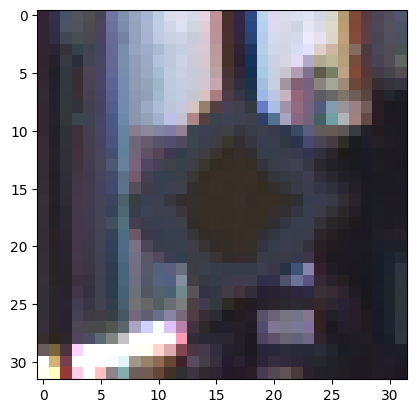

1/1 [==============================] - 0s 104ms/step
Predicted: Beware of an icy road ahead.


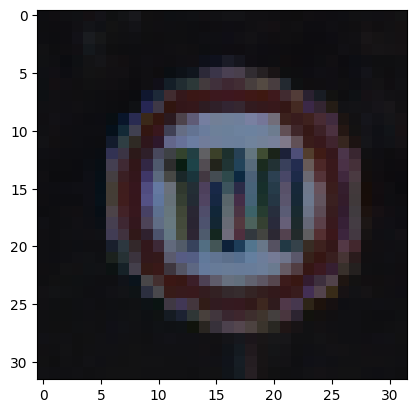

1/1 [==============================] - 0s 35ms/step
Predicted: Speed Limit-100


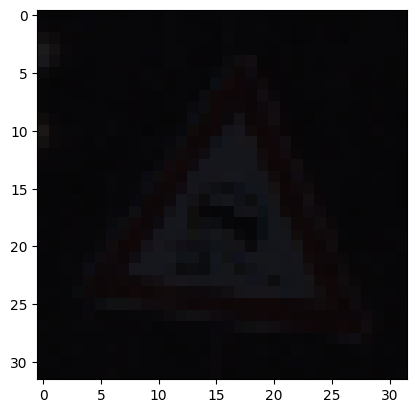

1/1 [==============================] - 0s 29ms/step
Predicted: The danger of skidding or slipping.


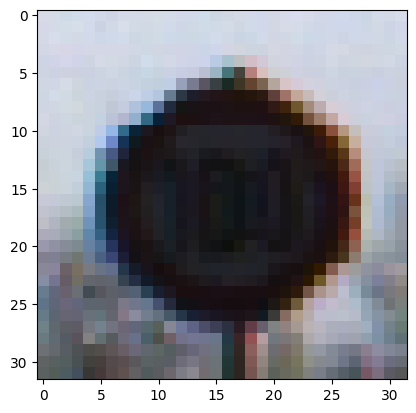

1/1 [==============================] - 0s 32ms/step
Predicted: Speed Limit-100


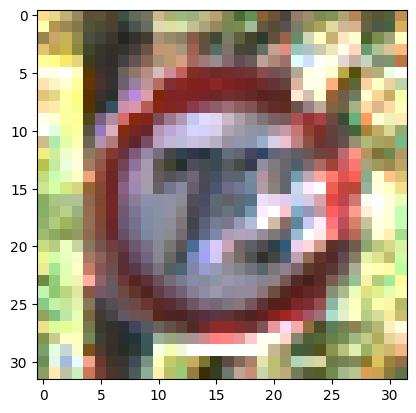

1/1 [==============================] - 0s 44ms/step
Predicted: Speed Limit-70


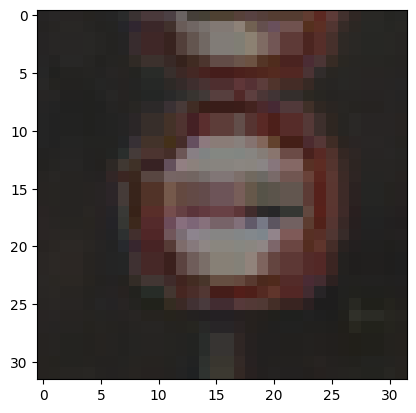

1/1 [==============================] - 0s 31ms/step
Predicted: No Passing (overtaking) for any vehicle type except one line (track) transport (like motorcycles and mopeds)


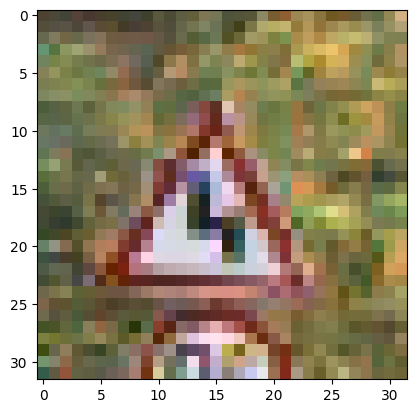

1/1 [==============================] - 0s 31ms/step
Predicted: Indicates an approaching double curve - first to the left


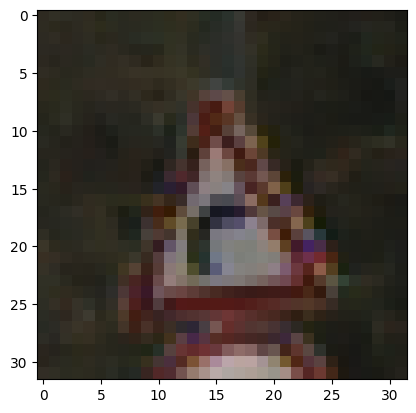

1/1 [==============================] - 0s 31ms/step
Predicted: A single curve is approaching in the right direction


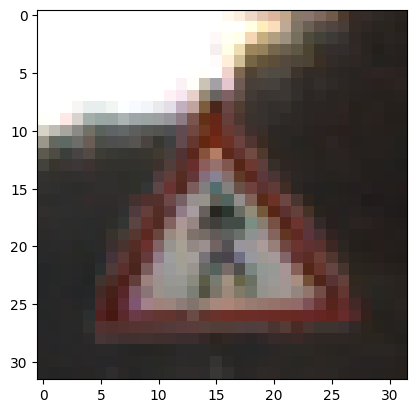

1/1 [==============================] - 0s 31ms/step
Predicted: Pedestrian crossing ahead.


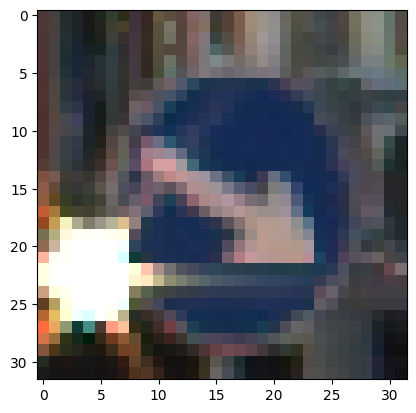

1/1 [==============================] - 0s 30ms/step
Predicted: Prescribed drive direction around the obstacle. Drive from the right of the obstacle.


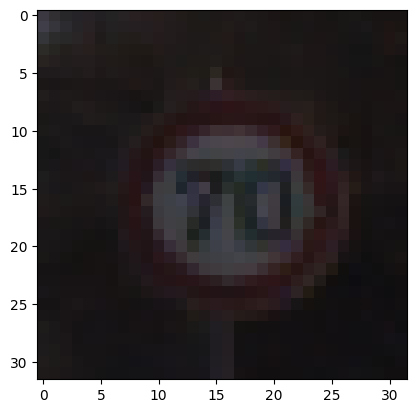

1/1 [==============================] - 0s 31ms/step
Predicted: Speed Limit-70


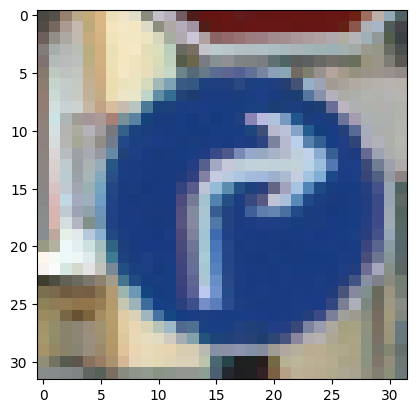

1/1 [==============================] - 0s 31ms/step
Predicted: Indicates that traffic must turn right


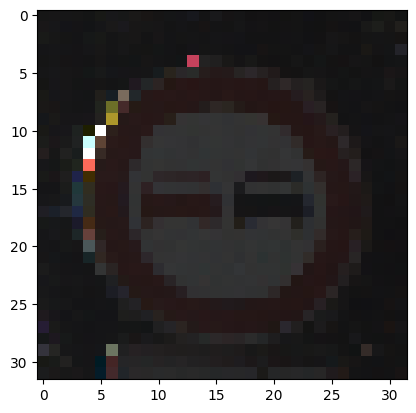

1/1 [==============================] - 0s 57ms/step
Predicted: No Passing (overtaking) for any vehicle type except one line (track) transport (like motorcycles and mopeds)


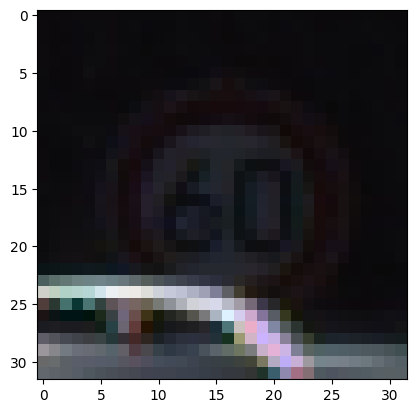

1/1 [==============================] - 0s 33ms/step
Predicted: Speed Limit-60


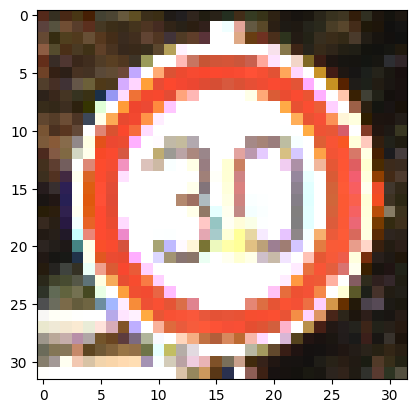

1/1 [==============================] - 0s 33ms/step
Predicted: Speed Limit-30


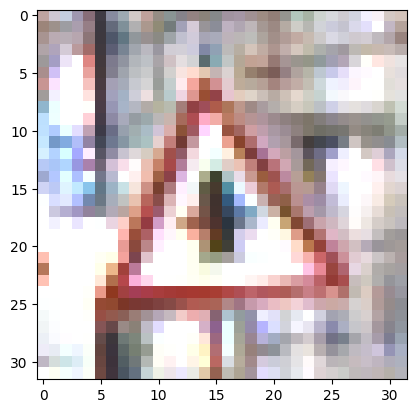

1/1 [==============================] - 0s 40ms/step
Predicted: Indicates priority only at the upcoming intersection or crossing


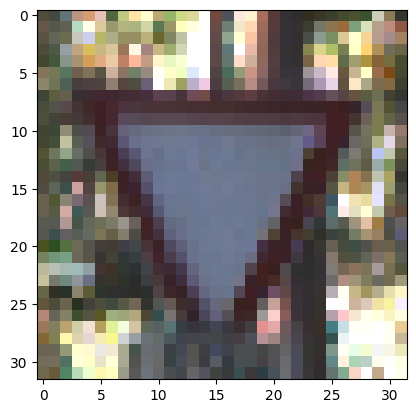

1/1 [==============================] - 0s 29ms/step
Predicted: Yield right-of-way


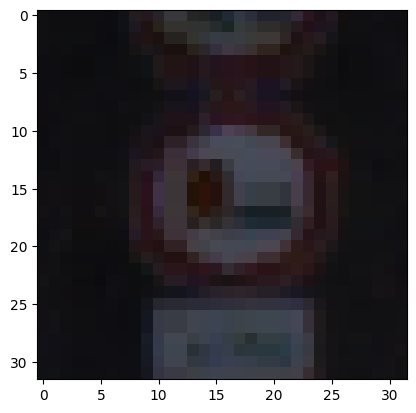

1/1 [==============================] - 0s 53ms/step
Predicted: No passing for vehicles with a total weight of over 3.5 t


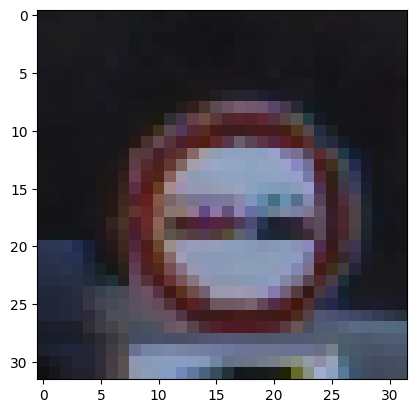

1/1 [==============================] - 0s 29ms/step
Predicted: No Passing (overtaking) for any vehicle type except one line (track) transport (like motorcycles and mopeds)


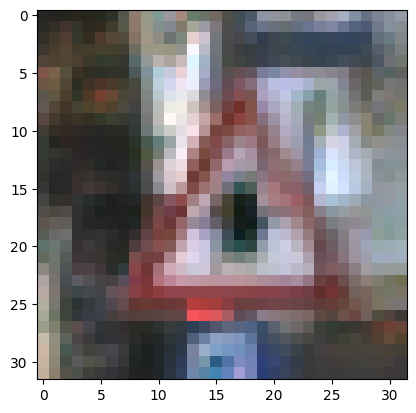

1/1 [==============================] - 0s 29ms/step
Predicted: Indicates priority only at the upcoming intersection or crossing


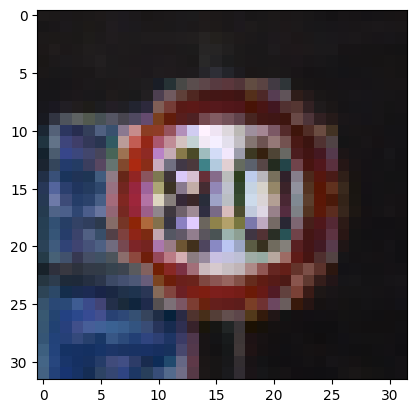

1/1 [==============================] - 0s 29ms/step
Predicted: Speed Limit-80


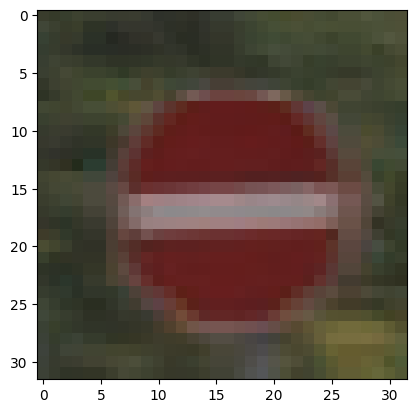

1/1 [==============================] - 0s 29ms/step
Predicted: Do not enter


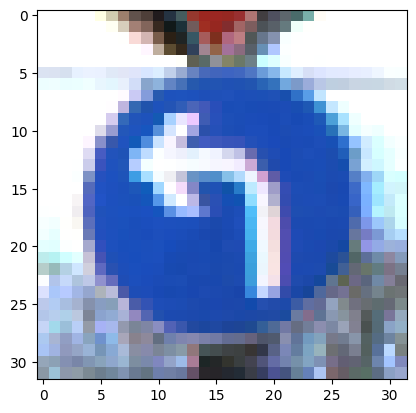

1/1 [==============================] - 0s 30ms/step
Predicted: ndicates that traffic must turn left


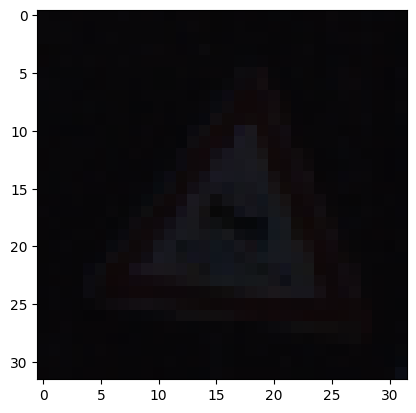

1/1 [==============================] - 0s 31ms/step
Predicted: A single curve is approaching in the left direction


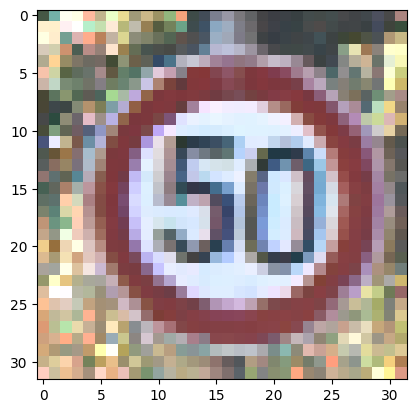

1/1 [==============================] - 0s 30ms/step
Predicted: Speed Limit-50


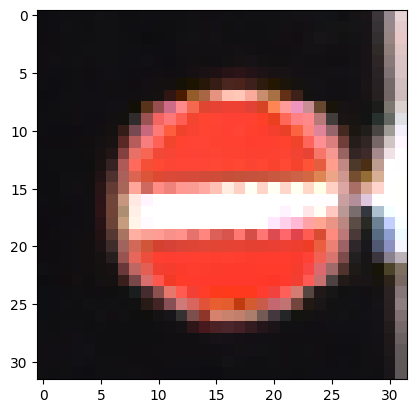

1/1 [==============================] - 0s 31ms/step
Predicted: Do not enter


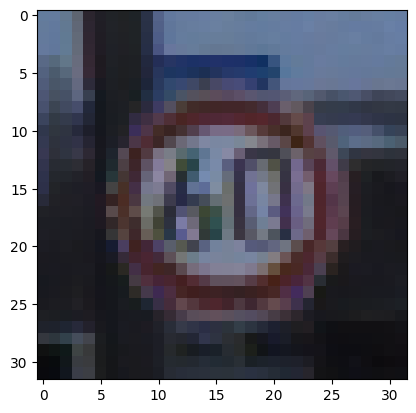

1/1 [==============================] - 0s 52ms/step
Predicted: Speed Limit-60


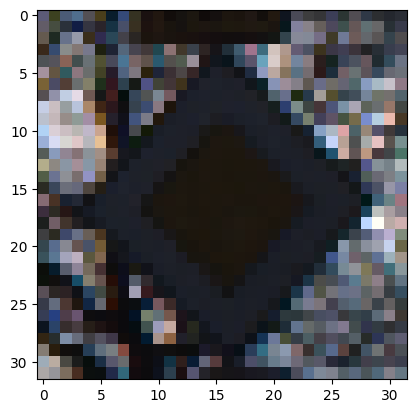

1/1 [==============================] - 0s 33ms/step
Predicted: Priority Road starts


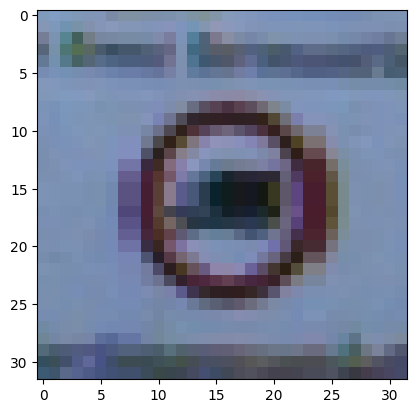

1/1 [==============================] - 0s 29ms/step
Predicted: No entry for motor vehicles with a maximum authorized mass of more than 3.5 t


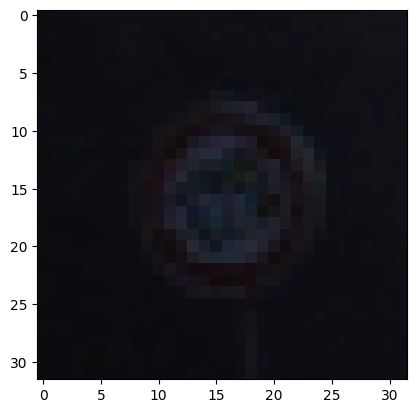

1/1 [==============================] - 0s 29ms/step
Predicted: Speed Limit-120


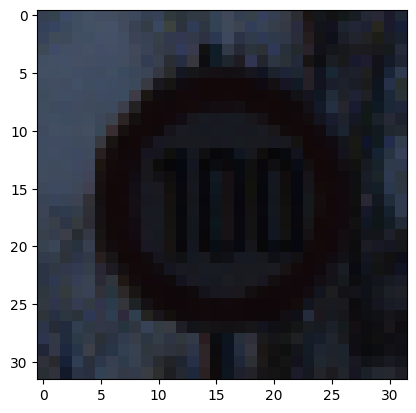

1/1 [==============================] - 0s 29ms/step
Predicted: Speed Limit-100


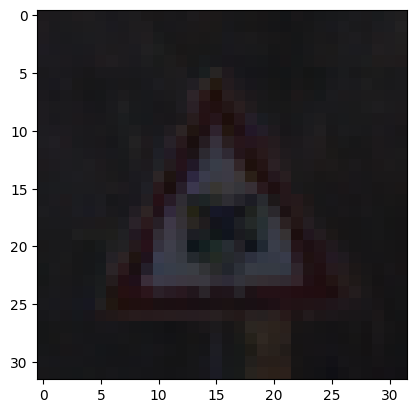

1/1 [==============================] - 0s 31ms/step
Predicted: Beware of an icy road ahead.


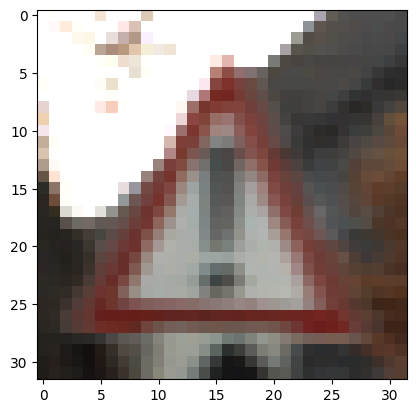

1/1 [==============================] - 0s 86ms/step
Predicted: This is a general danger or warning sign.


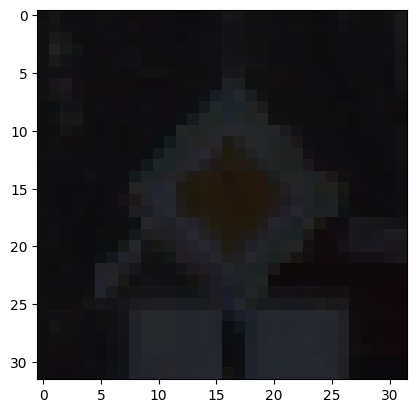

1/1 [==============================] - 0s 106ms/step
Predicted: Priority Road starts


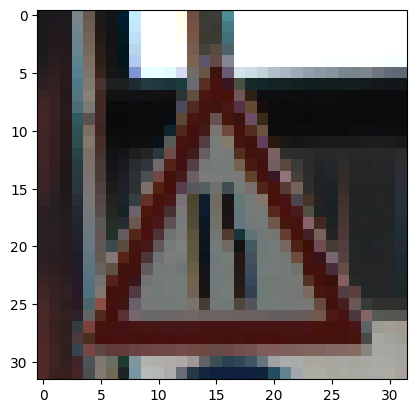

1/1 [==============================] - 0s 43ms/step
Predicted: he road narrows from the right side


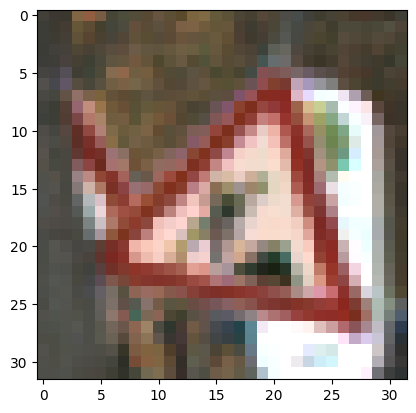

1/1 [==============================] - 0s 32ms/step
Predicted: Work in process


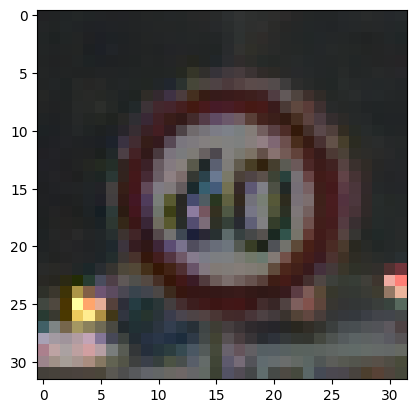

1/1 [==============================] - 0s 62ms/step
Predicted: Speed Limit-60


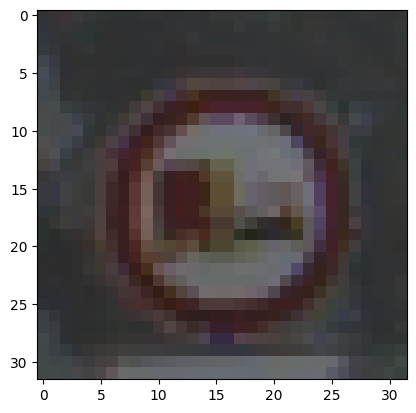

1/1 [==============================] - 0s 109ms/step
Predicted: No passing for vehicles with a total weight of over 3.5 t


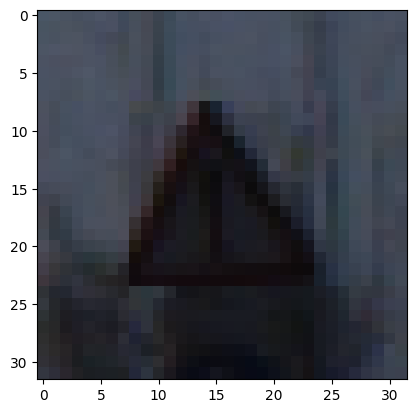

1/1 [==============================] - 0s 47ms/step
Predicted: This is a general danger or warning sign.


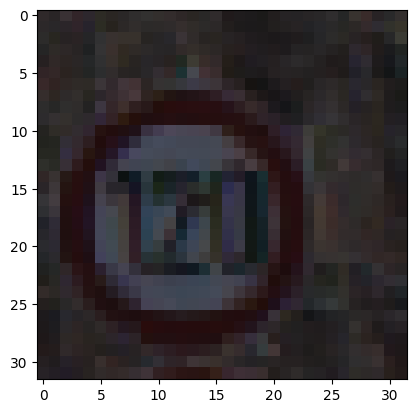

1/1 [==============================] - 0s 32ms/step
Predicted: Speed Limit-120


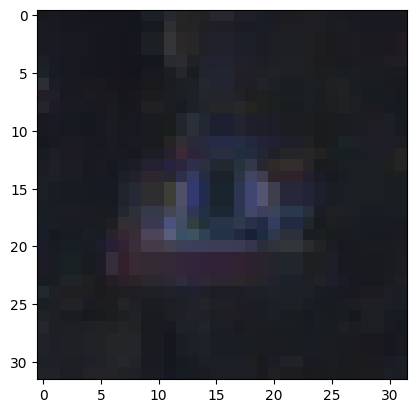

1/1 [==============================] - 0s 30ms/step
Predicted: Speed Limit-50


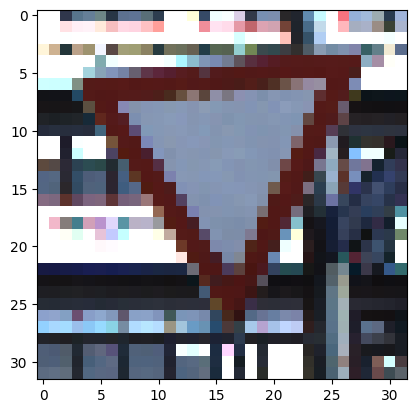

1/1 [==============================] - 0s 27ms/step
Predicted: Yield right-of-way


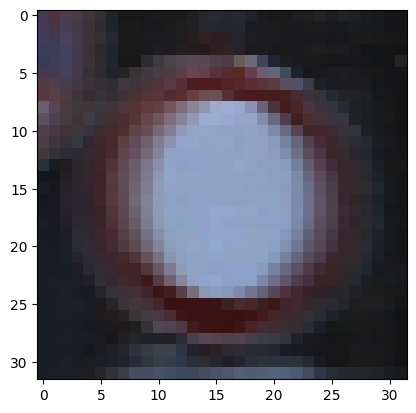

1/1 [==============================] - 0s 28ms/step
Predicted: No entry for any type of Vehicle


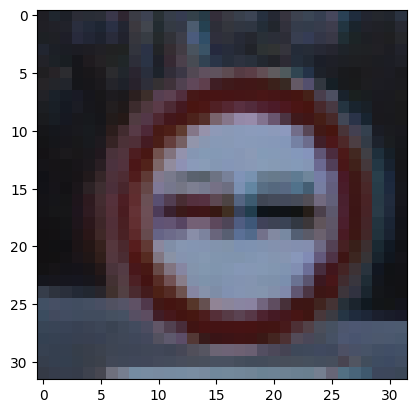

1/1 [==============================] - 0s 34ms/step
Predicted: No Passing (overtaking) for any vehicle type except one line (track) transport (like motorcycles and mopeds)


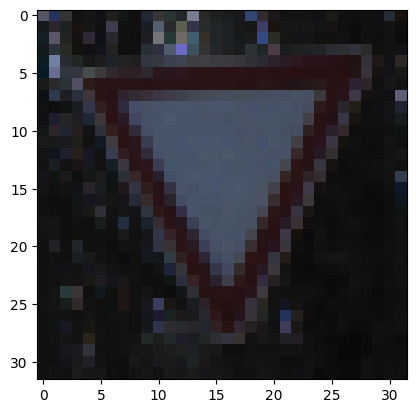

1/1 [==============================] - 0s 29ms/step
Predicted: Yield right-of-way


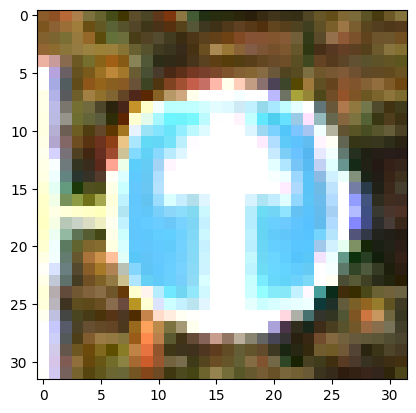

1/1 [==============================] - 0s 31ms/step
Predicted: The mandatory direction of travel is straight ahead. No turns are permitted


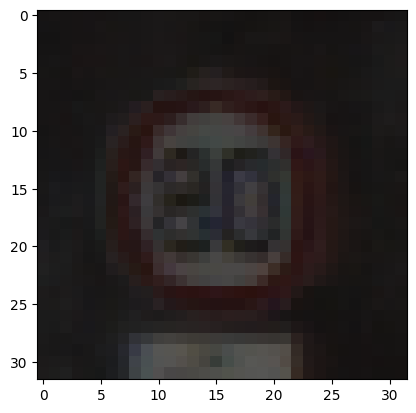

1/1 [==============================] - 0s 28ms/step
Predicted: Speed Limit-80


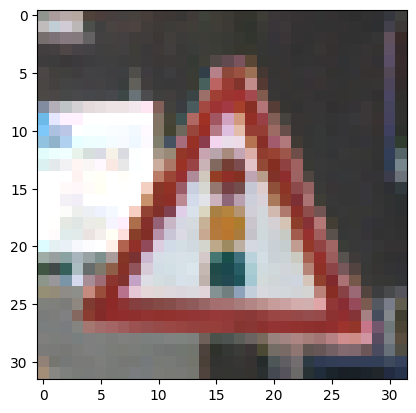

1/1 [==============================] - 0s 31ms/step
Predicted: Indicates the traffic signal ahead.


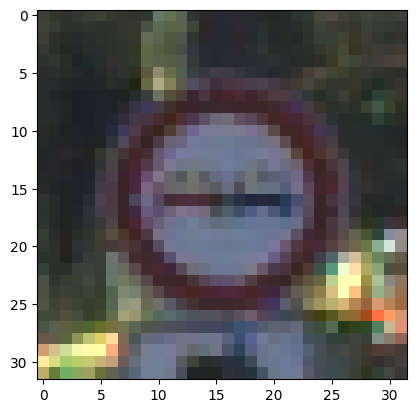

1/1 [==============================] - 0s 27ms/step
Predicted: No Passing (overtaking) for any vehicle type except one line (track) transport (like motorcycles and mopeds)


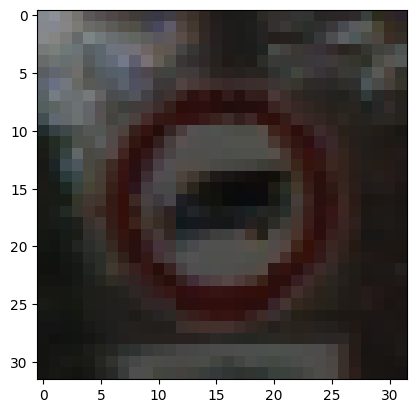

1/1 [==============================] - 0s 30ms/step
Predicted: No entry for motor vehicles with a maximum authorized mass of more than 3.5 t


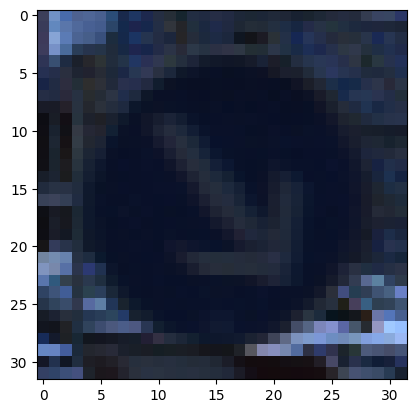

1/1 [==============================] - 0s 30ms/step
Predicted: Prescribed drive direction around the obstacle. Drive from the right of the obstacle.


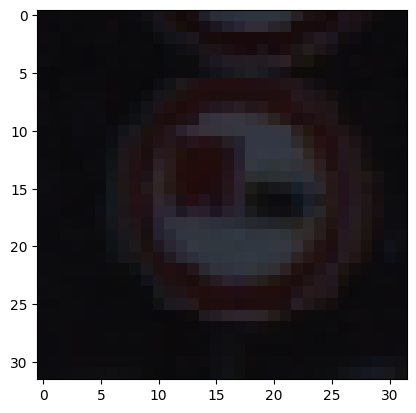

1/1 [==============================] - 0s 28ms/step
Predicted: No passing for vehicles with a total weight of over 3.5 t


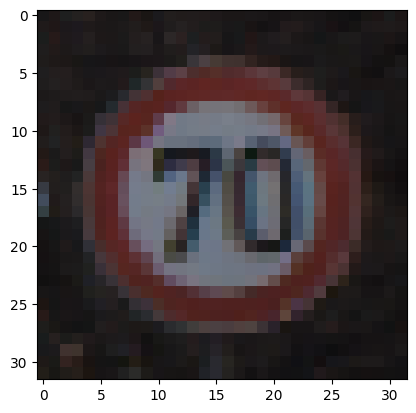

1/1 [==============================] - 0s 30ms/step
Predicted: Speed Limit-70


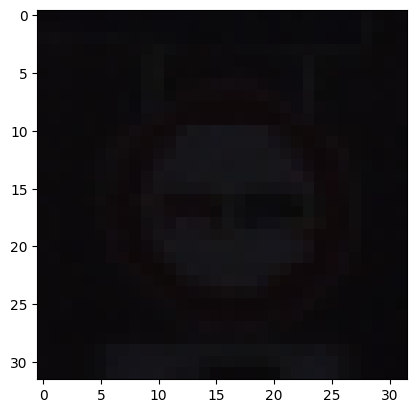

1/1 [==============================] - 0s 31ms/step
Predicted: No Passing (overtaking) for any vehicle type except one line (track) transport (like motorcycles and mopeds)


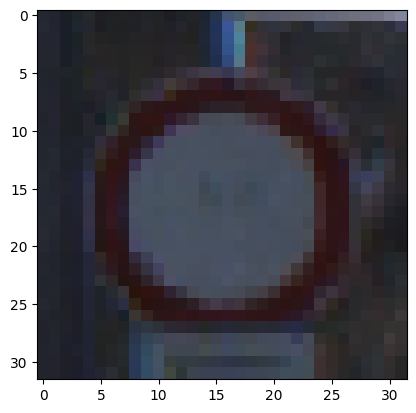

1/1 [==============================] - 0s 27ms/step
Predicted: No entry for any type of Vehicle


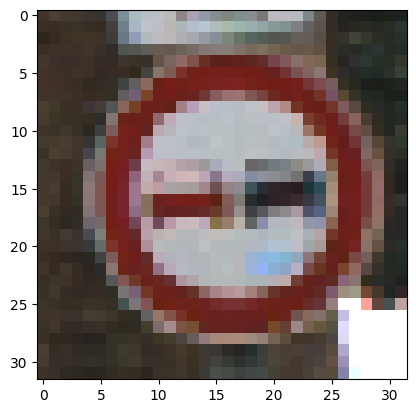

1/1 [==============================] - 0s 29ms/step
Predicted: No Passing (overtaking) for any vehicle type except one line (track) transport (like motorcycles and mopeds)


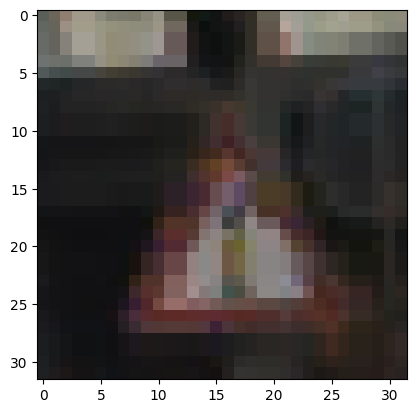

1/1 [==============================] - 0s 28ms/step
Predicted: Indicates the traffic signal ahead.


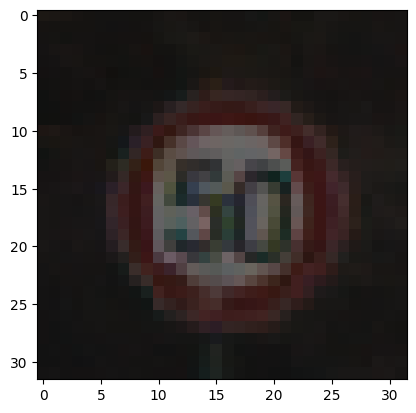

1/1 [==============================] - 0s 81ms/step
Predicted: Speed Limit-50


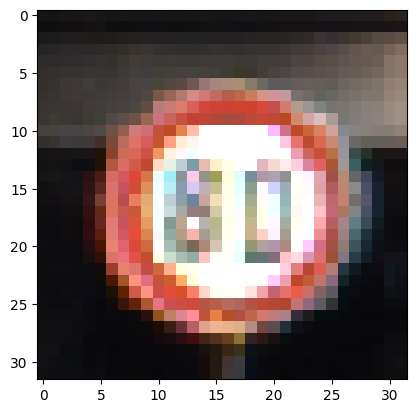

1/1 [==============================] - 0s 28ms/step
Predicted: Speed Limit-80


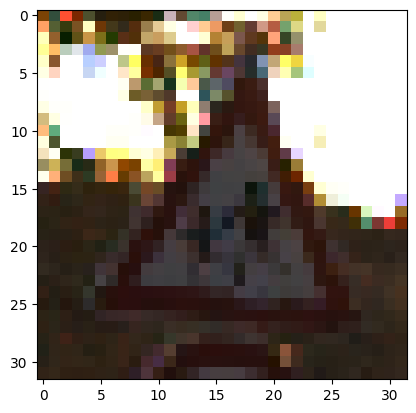

1/1 [==============================] - 0s 28ms/step
Predicted: Pay attention to children 


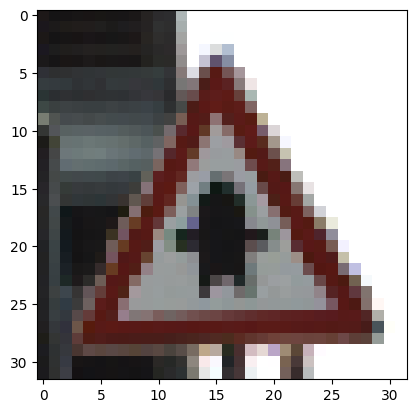

1/1 [==============================] - 0s 29ms/step
Predicted: Indicates priority only at the upcoming intersection or crossing


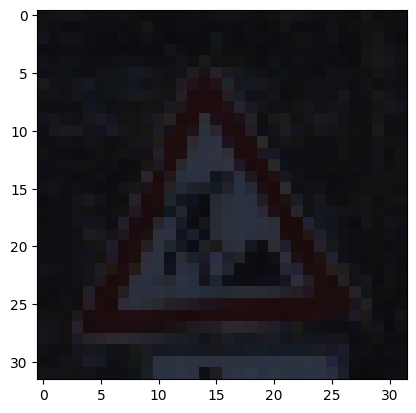

1/1 [==============================] - 0s 27ms/step
Predicted: Work in process


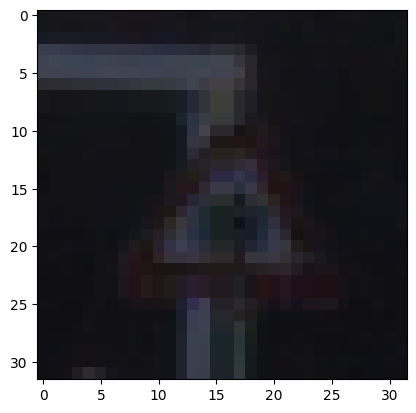

1/1 [==============================] - 0s 48ms/step
Predicted: Beware of an icy road ahead.


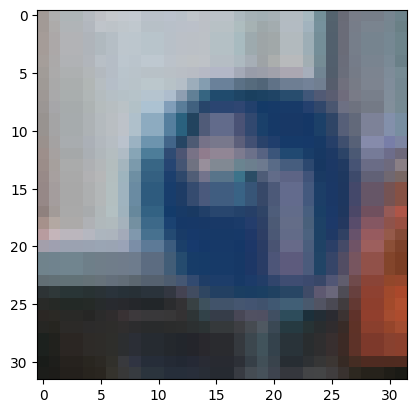

1/1 [==============================] - 0s 33ms/step
Predicted: ndicates that traffic must turn left


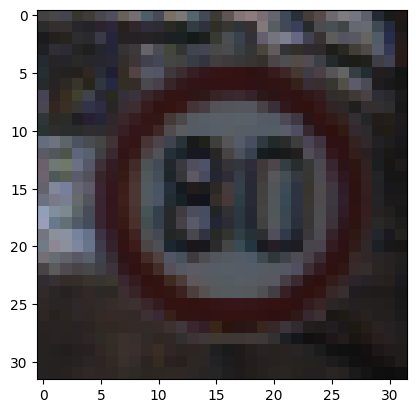

1/1 [==============================] - 0s 30ms/step
Predicted: Speed Limit-80


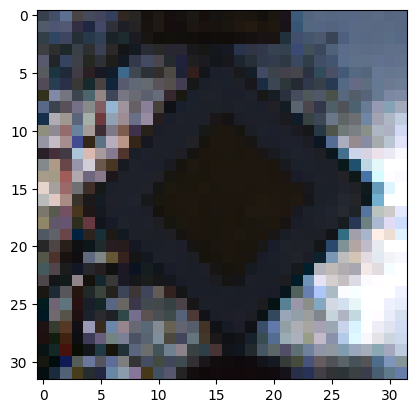

1/1 [==============================] - 0s 30ms/step
Predicted: Priority Road starts


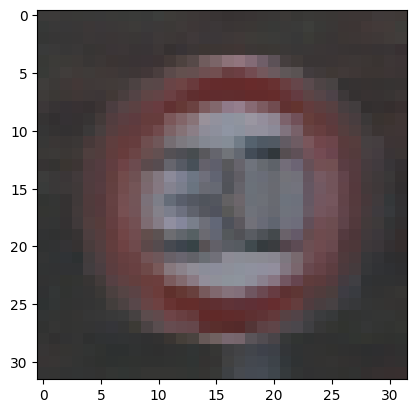

1/1 [==============================] - 0s 35ms/step
Predicted: Speed Limit-30


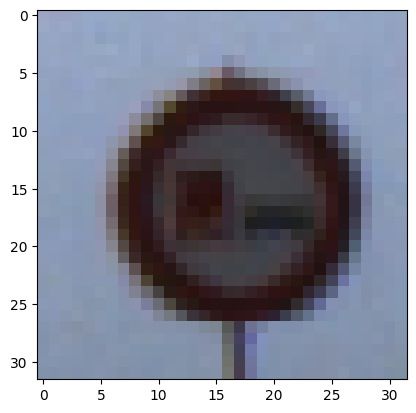

1/1 [==============================] - 0s 30ms/step
Predicted: No passing for vehicles with a total weight of over 3.5 t


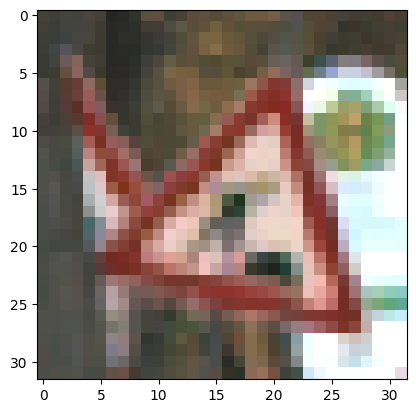

1/1 [==============================] - 0s 28ms/step
Predicted: Work in process


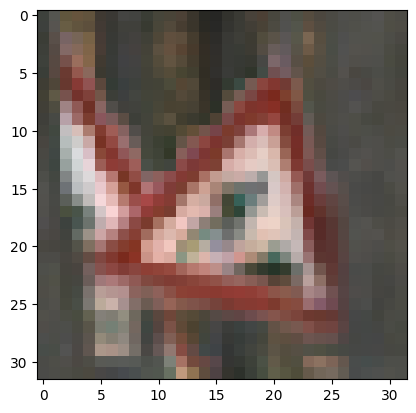

1/1 [==============================] - 0s 38ms/step
Predicted: Pedestrian crossing ahead.


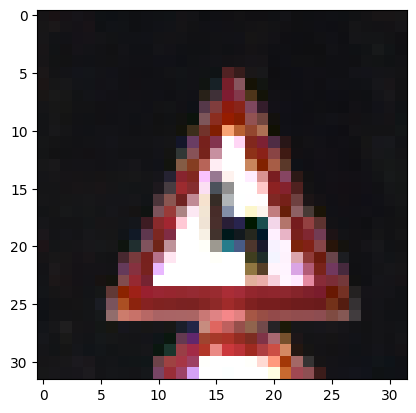

1/1 [==============================] - 0s 30ms/step
Predicted: Indicates an approaching double curve - first to the left


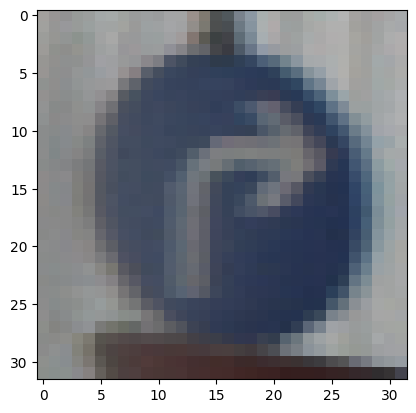

1/1 [==============================] - 0s 45ms/step
Predicted: Indicates that traffic must turn right


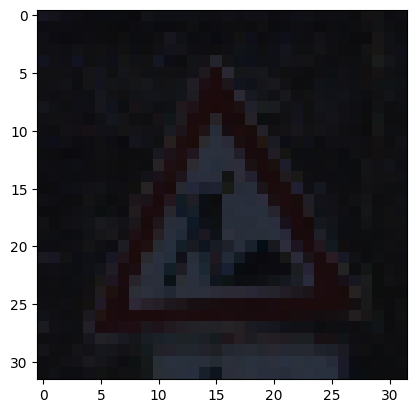

1/1 [==============================] - 0s 35ms/step
Predicted: Work in process


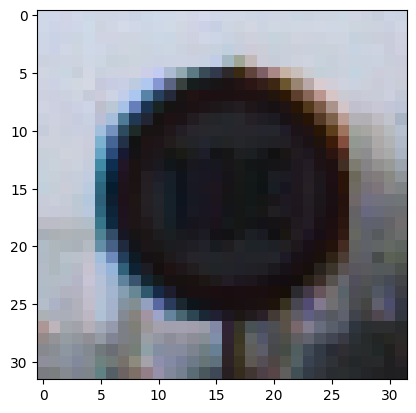

1/1 [==============================] - 0s 38ms/step
Predicted: Speed Limit-100


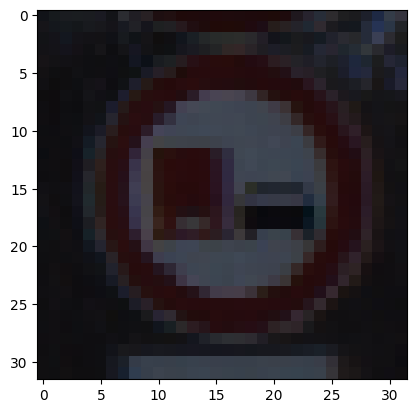

1/1 [==============================] - 0s 40ms/step
Predicted: No passing for vehicles with a total weight of over 3.5 t


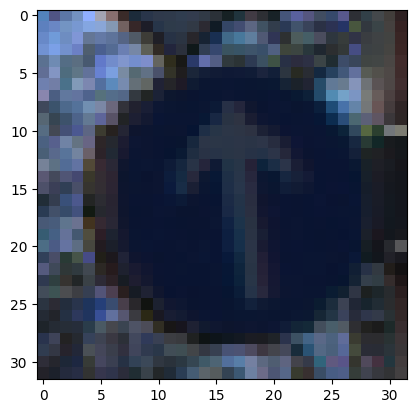

1/1 [==============================] - 0s 38ms/step
Predicted: The mandatory direction of travel is straight ahead. No turns are permitted


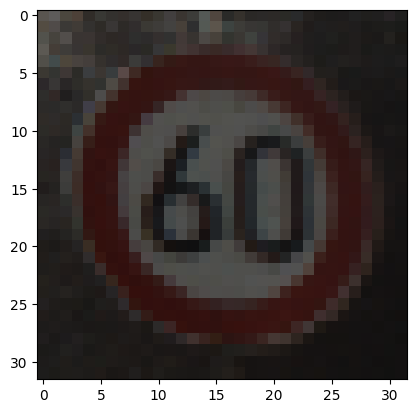

1/1 [==============================] - 0s 33ms/step
Predicted: Speed Limit-60


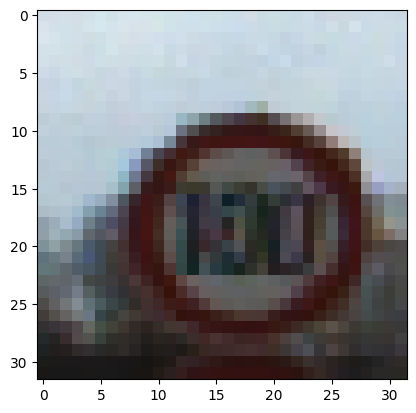

1/1 [==============================] - 0s 35ms/step
Predicted: Speed Limit-100


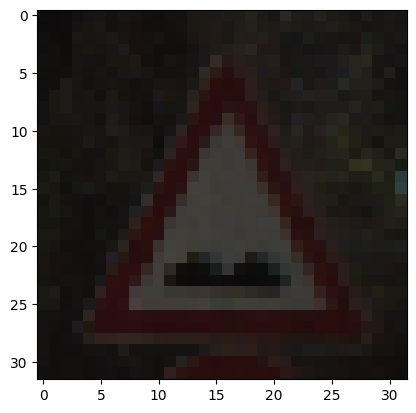

1/1 [==============================] - 0s 33ms/step
Predicted: Warning of a rough road ahead.


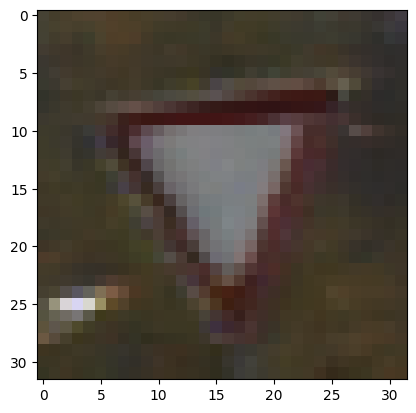

1/1 [==============================] - 0s 68ms/step
Predicted: Yield right-of-way


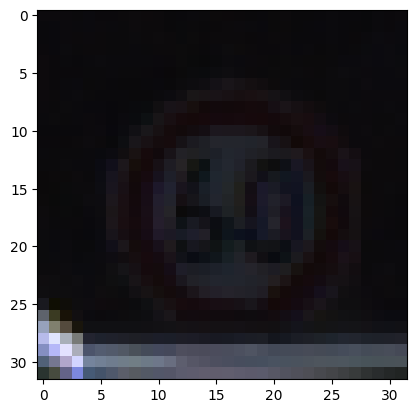

1/1 [==============================] - 0s 29ms/step
Predicted: Speed Limit-60


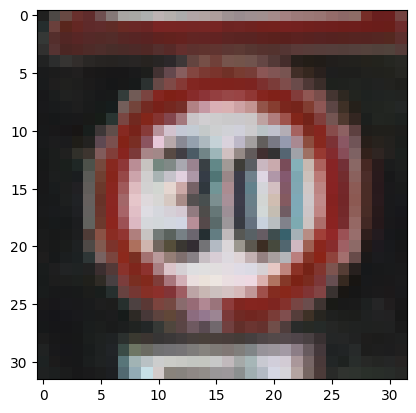

1/1 [==============================] - 0s 28ms/step
Predicted: Speed Limit-30


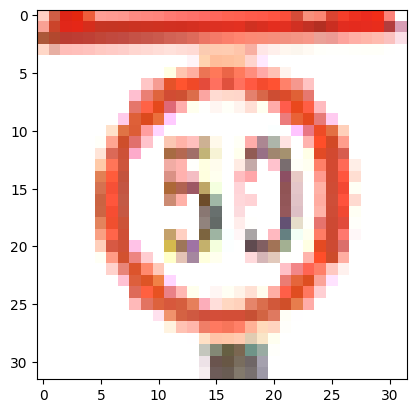

1/1 [==============================] - 0s 28ms/step
Predicted: Speed Limit-50


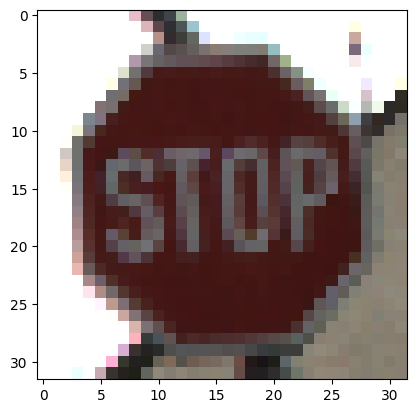

1/1 [==============================] - 0s 47ms/step
Predicted: STOP


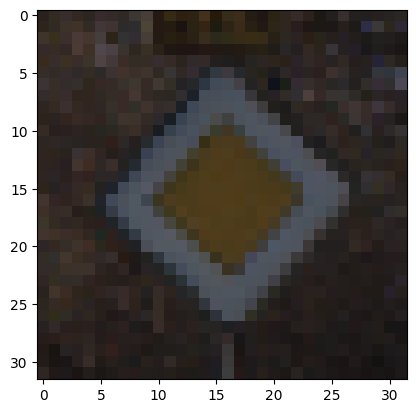

1/1 [==============================] - 0s 29ms/step
Predicted: Priority Road starts


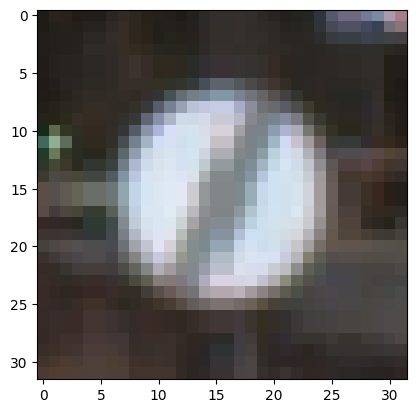

1/1 [==============================] - 0s 28ms/step
Predicted: Priority Road starts


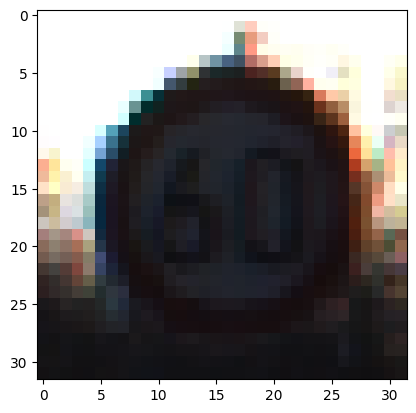

1/1 [==============================] - 0s 27ms/step
Predicted: Speed Limit-60


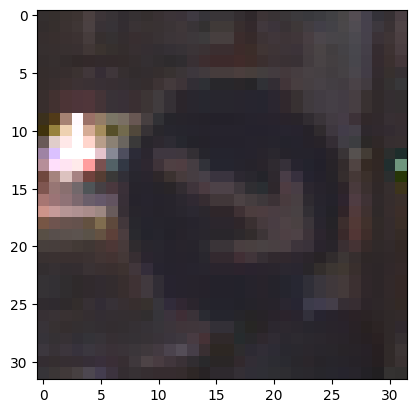

1/1 [==============================] - 0s 35ms/step
Predicted: Prescribed drive direction around the obstacle. Drive from the right of the obstacle.


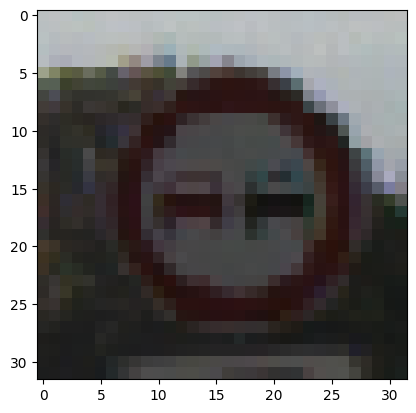

1/1 [==============================] - 0s 29ms/step
Predicted: No Passing (overtaking) for any vehicle type except one line (track) transport (like motorcycles and mopeds)


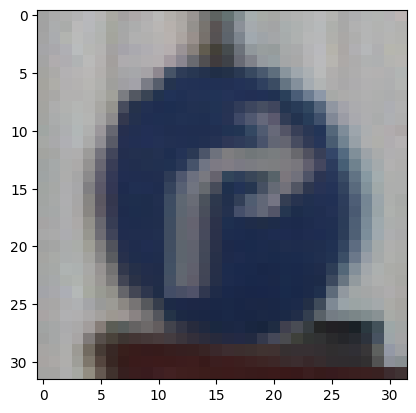

1/1 [==============================] - 0s 48ms/step
Predicted: Indicates that traffic must turn right


In [37]:
for i in range(10,100):
    image_path='Test/000'+str(i)+'.png'
    img=image.load_img(image_path,target_size=(32,32,3))
    plt.imshow(img)
    plt.show()
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    images=np.vstack([x])
    pred=model.predict(images)
    label=np.argmax(pred,axis=1)
    print('Predicted: '+dic[np.argmax(pred)])

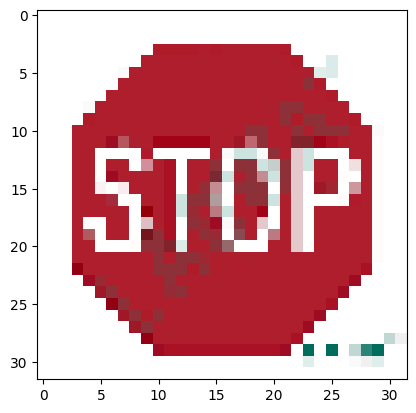

1/1 [==============================] - 0s 43ms/step
Predicted: STOP


In [31]:
    image_path='C:/Users/admin/Downloads/download.png'
    img=image.load_img(image_path,target_size=(32,32,3))
    plt.imshow(img)
    plt.show()
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    images=np.vstack([x])
    pred=model.predict(images)
    label=np.argmax(pred,axis=1)
    print('Predicted: '+dic[np.argmax(pred)])

In [ ]:
    image_path=''
    img=image.load_img(image_path,target_size=(32,32,3))
    plt.imshow(img)
    plt.show()
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    images=np.vstack([x])
    pred=model.predict(images)
    label=np.argmax(pred,axis=1)
    print('Predicted: '+dic[np.argmax(pred)])